In [1]:
#importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking the number of rows and columns
df.shape

(7043, 21)

# Data-Preprocessing

In [4]:
df.drop(columns="customerID", inplace = True)

In [6]:
#checking if there is any duplicates value or not
df.duplicated().sum()

22

In [7]:
#dropping the duplicates
df.drop_duplicates(inplace = True) #inplace = True will change it permanently

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [11]:
#checking if there is any null value or not
df.isnull().any().sum()

1

In [12]:
#dropping the null values
df.dropna(inplace = True)

In [13]:
df.isnull().any().sum()

0

In [16]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
#checking the unique columns in each column
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

# Customer Demographics

Text(0.5, 1.0, 'Dependents')

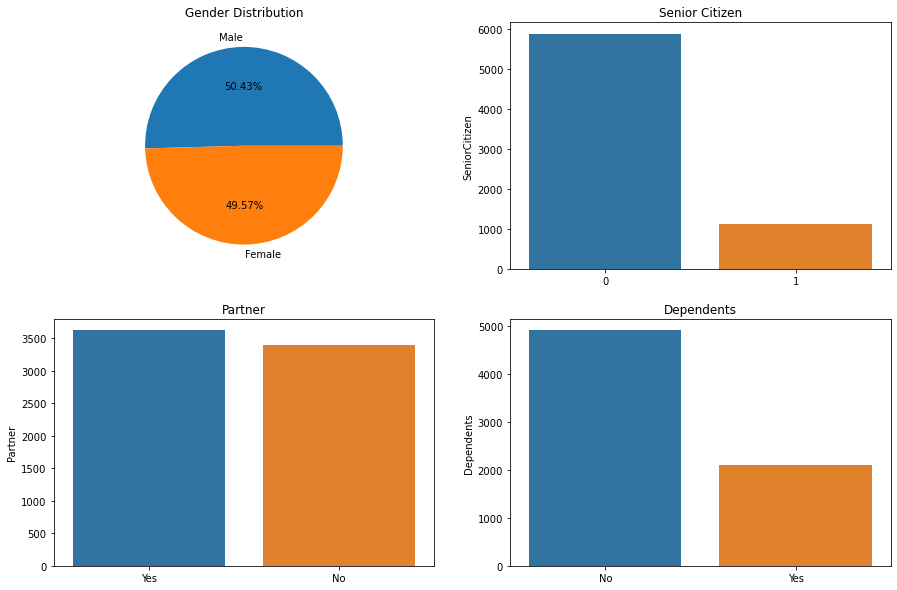

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender distribution
ax[0, 0].pie(df['gender'].value_counts(), labels = ['Male', 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')

#Senior Citizen Distribution
sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')

#Partner Distribution
sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique(), ax=ax[1,0]).set_title('Partner')

#Dependents Distribution
sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomers don't. Majority of the customers don't have dependents, but still a significant number does have dependents.

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

# Services

Text(0.5, 1.0, 'Streaming Movies')

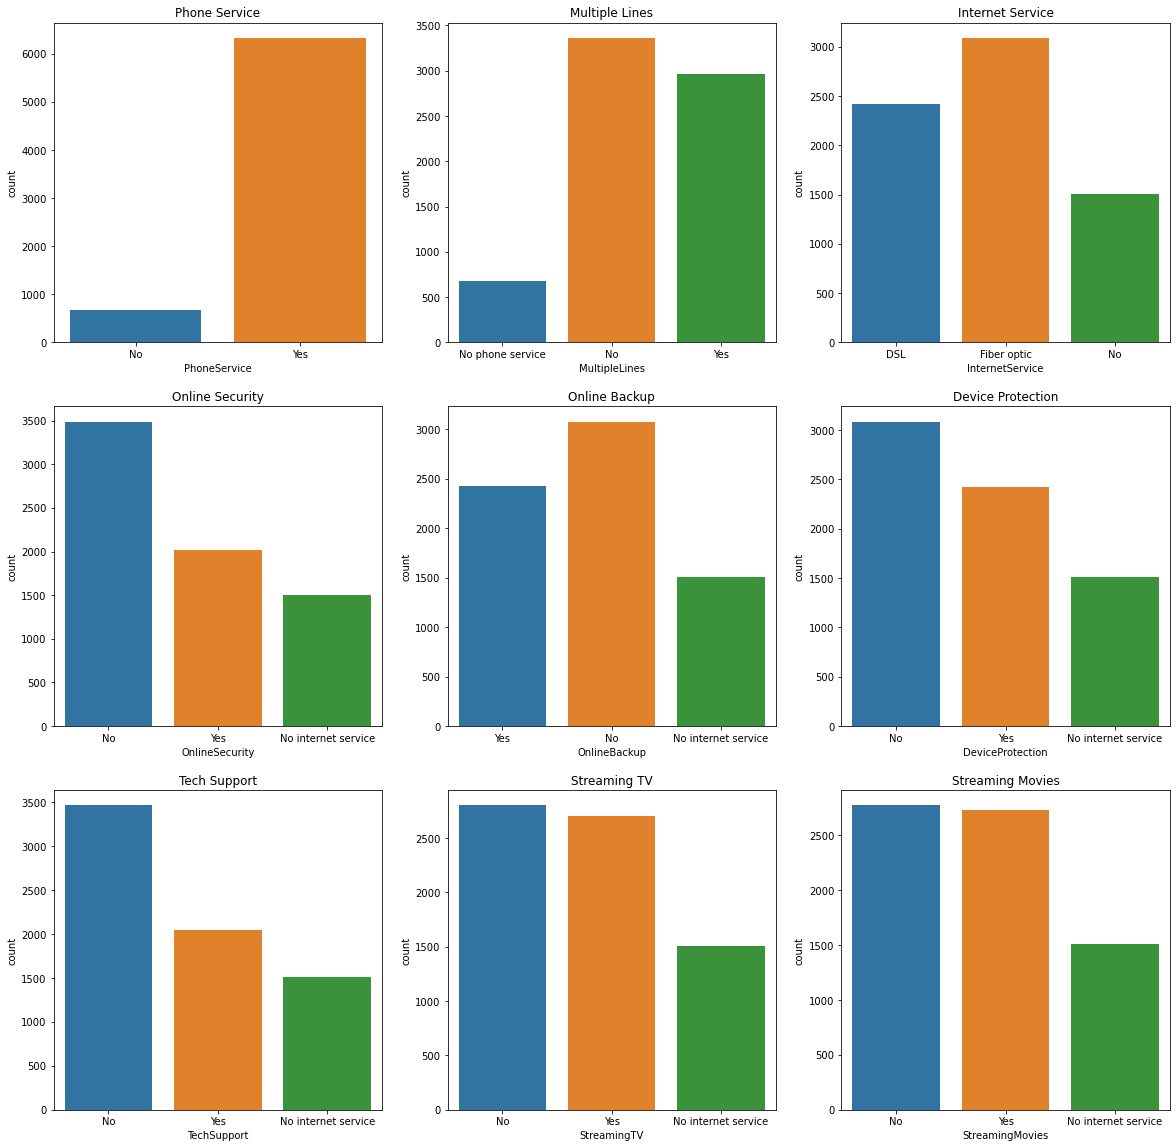

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

Coming to other services which includes- Online Security, Online Backup, Device Protection, Tech Support, and Streaming Services. The online backup and device protection service is opted by almost 2500 customers, which higlights the customers concern regarding their device safety and data protection. The online security and tech support is opted by almost 2000 customers which are least opted services among the customers. The streaming services are the most popular services, with more than 2500 customers opting for it.

From this,I conclude that part from the internet and phone services, the streaming services are most opted ones. Therefore, the company should focus on providing better streaming services to the customers.

# Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

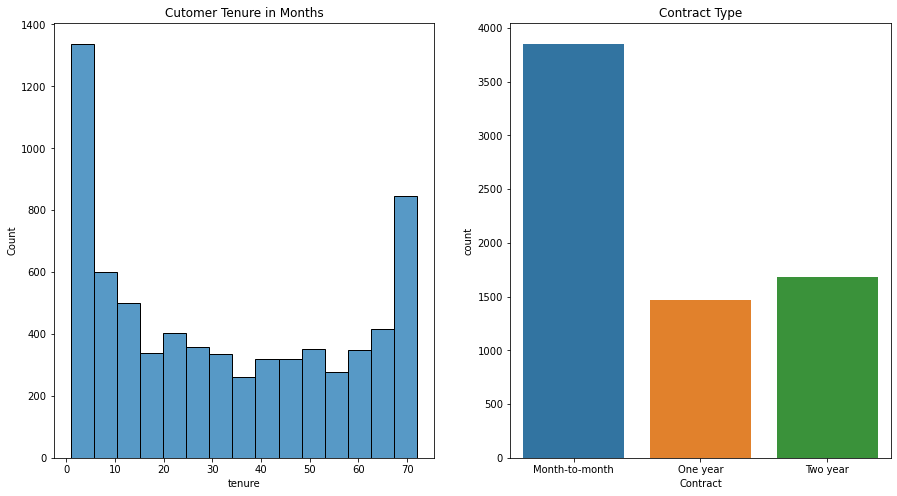

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

# Billing and Charges

Text(0.5, 1.0, 'Total Charges')

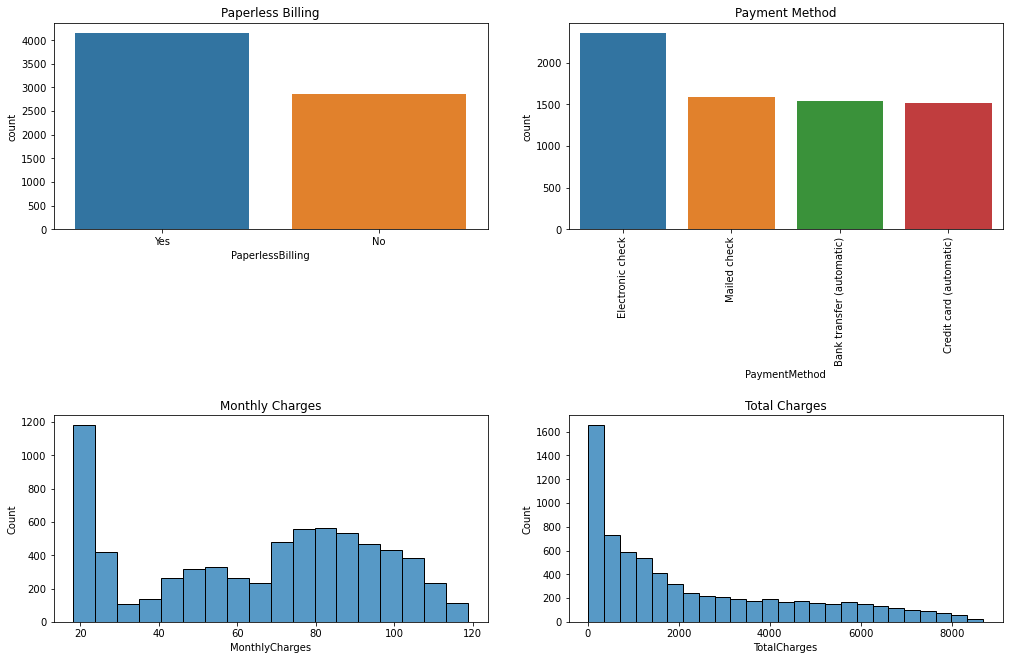

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)


#papaerless billing
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')

#Payment Method
sns.countplot(x = df['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0]).set_title('Monthly Charges')

#Total Charges
sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1]).set_title('Total Charges')

# Data Preprocessing part 2

# outlier's removal

In [25]:
#columsn of outlier's removal
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#using IQR method to remove outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#removing the outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Label Encoding 

In [28]:
from sklearn.preprocessing import LabelEncoder

#columns for label encoding
cols = df.columns[df.dtypes == 'object']

#label encoding object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



# Feature scaler

In [29]:
from sklearn.preprocessing import StandardScaler

#standardizing the data
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Correlation matrix heatmap

<AxesSubplot:>

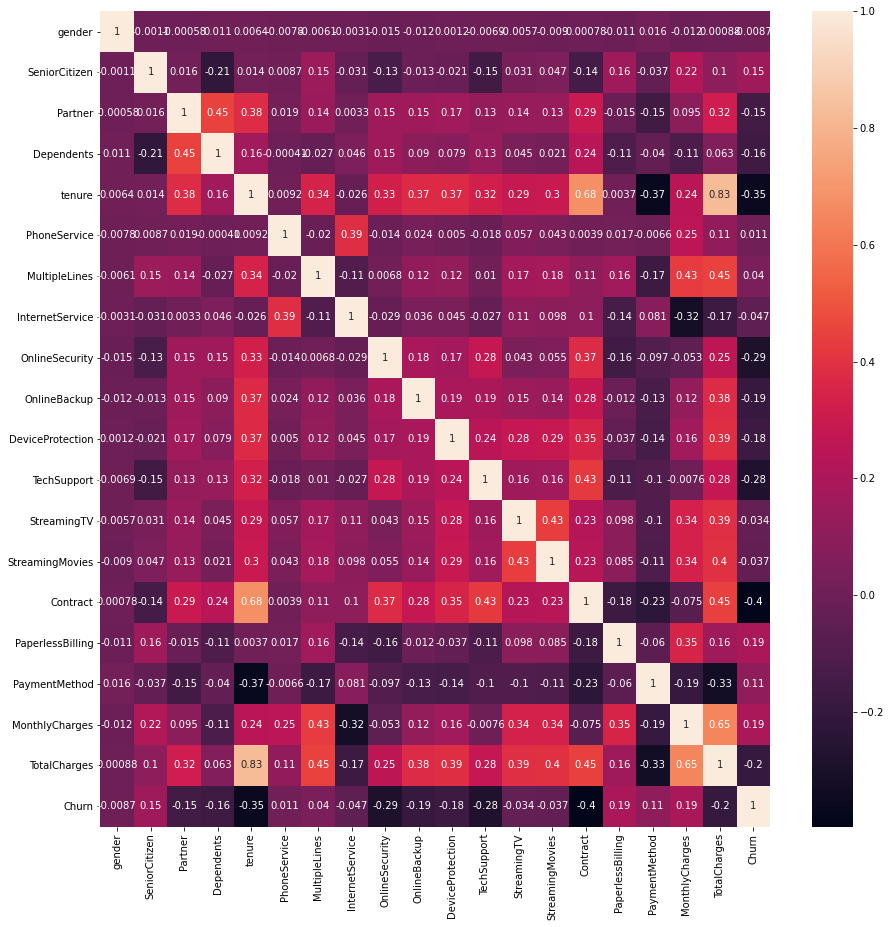

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True)

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Churn'), df['Churn'], test_size = 0.2, random_state = 587)

# Model Building

I will be using the following models to predict the customer churn:

Decision Tree Classifier
Random Forest Classifier
K Nearest Neighbors Classifier

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

#decision tree classifer
dtree = DecisionTreeClassifier()

# Hyperparameter Tuning using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [36]:
#Decision Tree Classifier Object with best parameters
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)

#Fitting the data
dtree.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8049215406562055


# Random Forest Classifier|

In [37]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 0}


In [39]:
#Random Forest Classifier Object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)

#Fitting the data
rfc.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8323823109843081


# Model Evaluation

Confusion Matrix Heatmap

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

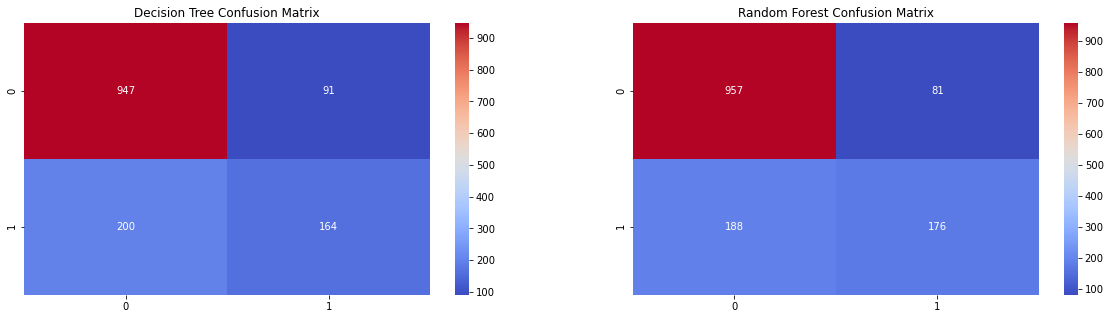

In [44]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[0], cmap='coolwarm', fmt = 'd').set_title('Decision Tree Confusion Matrix')

#Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[1], cmap='coolwarm', fmt = 'd').set_title('Random Forest Confusion Matrix')

The confusion matrix heatmaps visulaizes the true positive and true negative results from the machine learning model. Here, in the above confusion matrix, when see that the Random Forest Classifier has the highest true positive and true negative results, with considerbly less false positive and false negative results. Therefore, the Random Forest Classifier is the best model for predicting the customer churn.

# Distribution Plot

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Churn', ylabel='Density'>

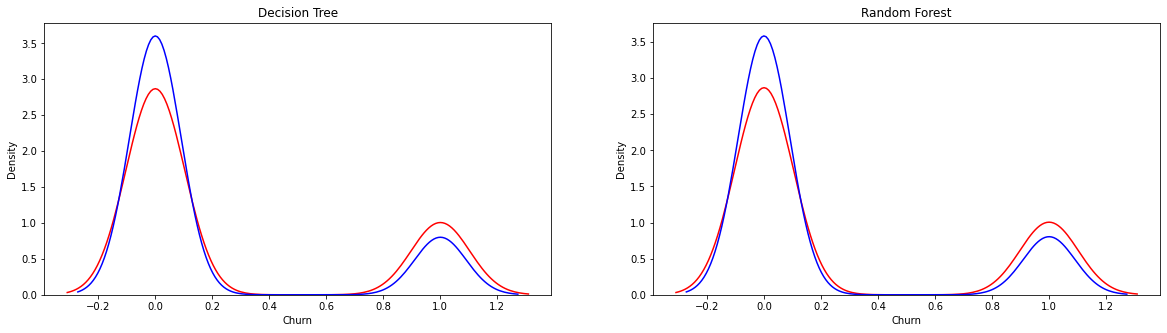

In [48]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#Decision Tree 
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Decision Tree')
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Random Forest
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Random Forest')
sns.distplot(r_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])

# Classification Report

In [49]:
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))

print('Random Forest Classification Report: \n', classification_report(y_test, r_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.64      0.45      0.53       364

    accuracy                           0.79      1402
   macro avg       0.73      0.68      0.70      1402
weighted avg       0.78      0.79      0.78      1402

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1038
           1       0.68      0.48      0.57       364

    accuracy                           0.81      1402
   macro avg       0.76      0.70      0.72      1402
weighted avg       0.80      0.81      0.80      1402



# Model Metrics

Text(0.5, 1.0, 'F1 Score')

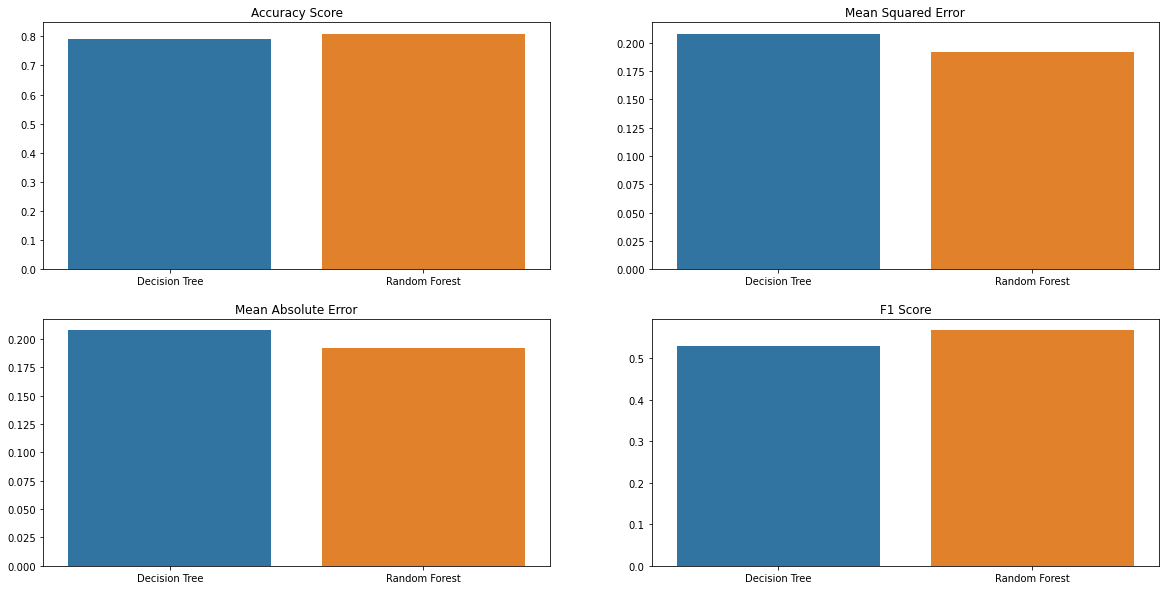

In [52]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score


#Bar plots
fig, ax = plt.subplots(2,2, figsize=(20, 10))

#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred)], ax=ax[0,0]).set_title('Accuracy Score')

#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred)], ax=ax[0,1]).set_title('Mean Squared Error')

#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred)], ax=ax[1,0]).set_title('Mean Absolute Error')

#F1 Score
sns.barplot(x = ['Decision Tree', 'Random Forest'], y = [f1_score(y_test, d_pred), f1_score(y_test, r_pred)], ax=ax[1,1]).set_title('F1 Score')


These graphs compares the models based on the metrics such as accuracy score, mean squared error, mean absolute error and f1 score. The Random Forest Classifier has the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Random Forest Classifier is a good fit for predicting the customer churn.

# Feature Importance

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

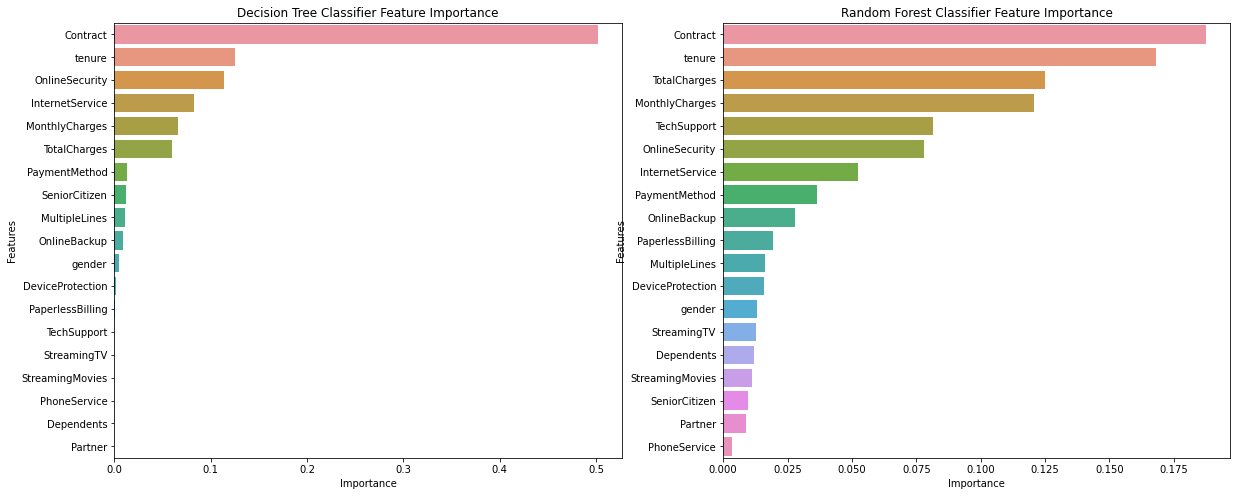

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')

From both the models, it is clear that the tenure, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.

# Conclusion